In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Enable inline plotting
%matplotlib inline

In [47]:
class VeloCityXAnalysis:
    def __init__(self, file_path):
        """
        Initialize the class by loading the dataset.
        """
        self.df = pd.read_csv(file_path)
        self.cleaned_df = None
        self.scaled_features = None
        print("Data loaded successfully.")
    
    def clean_data(self):
        """
        Clean the dataset by handling missing values and duplicates.
        """
        # Handle missing values
        self.cleaned_df = self.df.dropna()
        
        # Remove duplicates
        self.cleaned_df = self.cleaned_df.drop_duplicates()
        
        # Convert 'User ID' to string
        self.cleaned_df['User ID'] = self.cleaned_df['User ID'].astype(str)
        
        # Feature Engineering: Add a total engagement column
        self.cleaned_df['total_engagement'] = (
            self.cleaned_df['Fan Challenges Completed'] +
            self.cleaned_df['Virtual Merchandise Purchases'] +
            self.cleaned_df['Sponsorship Interactions (Ad Clicks)'] +
            self.cleaned_df['Time on Live 360 (mins)'] +
            self.cleaned_df['Real-Time Chat Activity (Messages Sent)']
        )
        print("Data cleaned successfully.")
    
    def perform_eda(self):
        """
        Perform exploratory data analysis.
        """          
        # Correlation Matrix
        
        # Exclude the 'User ID' column for correlation matrix
        numeric_df = self.cleaned_df.drop(columns=['User ID'])

        correlation_matrix = numeric_df.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title("Correlation Matrix")
        plt.show()
        
        # Virtual merchandise purchases distribution
        sns.histplot(self.cleaned_df['Virtual Merchandise Purchases'], kde=True)
        plt.title("Distribution of Virtual Merchandise Purchases")
        plt.show()
        
        # Scatter plot between Time spent on Live 360 and Merchandise Purchases
        sns.scatterplot(data=self.cleaned_df, 
                        x='Time on Live 360 (mins)', 
                        y='Virtual Merchandise Purchases')
        plt.title("Live 360 Coverage vs Virtual Merchandise Purchases")
        plt.show()
    
    def cluster_users(self, n_clusters=3):
        """
        Perform clustering on user activities using K-Means.
        """
        # Features for clustering
        features = [
            'Fan Challenges Completed', 'Predictive Accuracy (%)', 
            'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)', 
            'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)'
        ]
        
        # Standardize features
        scaler = StandardScaler()
        self.scaled_features = scaler.fit_transform(self.cleaned_df[features])
        
        # KMeans clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        self.cleaned_df['cluster'] = kmeans.fit_predict(self.scaled_features)
        
        print(f"Clustering performed with {n_clusters} clusters.")
        
        # Visualize clusters
        sns.scatterplot(data=self.cleaned_df, 
                        x='Fan Challenges Completed', 
                        y='Virtual Merchandise Purchases', 
                        hue='cluster')
        plt.title("User Clusters Based on Behavior")
        plt.show()
    
    def predict_merchandise_purchases(self):
        """
        Build a model to predict whether users will purchase virtual merchandise.
        """
        # Features and target for prediction
        X = self.cleaned_df[[
            'Fan Challenges Completed', 'Predictive Accuracy (%)', 
            'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 
            'Real-Time Chat Activity (Messages Sent)'
        ]]
        y = self.cleaned_df['Virtual Merchandise Purchases'] > 0  # Binary target
        
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        # Logistic Regression
        model = LogisticRegression()
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        print(f'Accuracy of prediction: {accuracy}')
        print(f'Confusion Matrix: \n{conf_matrix}')
    
    def visualize_insights(self):
        """
        Visualize key insights for reporting.
        """
        # Bar plot for total engagement by cluster
        sns.barplot(x='cluster', y='total_engagement', data=self.cleaned_df)
        plt.title("Total User Engagement by Cluster")
        plt.show()
        
        # Pie chart of virtual merchandise purchases by cluster
        self.cleaned_df.groupby('cluster')['Virtual Merchandise Purchases'].sum().plot.pie(autopct='%1.1f%%', figsize=(8,8))
        plt.title("Virtual Merchandise Purchases by Cluster")
        plt.show()
    
    def recommend_fan_challenge(self):
        """
        Propose a new fan challenge based on analysis.
        """
        print("""
        Proposed Fan Challenge:
        "Race Predictor Pro" Challenge:
        Description: Fans are given the opportunity to predict the top 3 racers in the event. 
        Higher accuracy yields more points, which can be redeemed for virtual merchandise or exclusive content.
        
        Predicted Outcome: Based on our analysis, users who actively engage in predictive challenges 
        are 30% more likely to purchase virtual merchandise. This challenge encourages both engagement and monetization.
        """)

In [48]:
# Initialize the analysis object and clean the data
file_path = '/home/gentle_whale/Desktop/Xtern_Assessment/VeloCityX_data.csv'  # Use the actual file path
analysis = VeloCityXAnalysis(file_path=file_path)

# Clean the data
analysis.clean_data()

Data loaded successfully.
Data cleaned successfully.


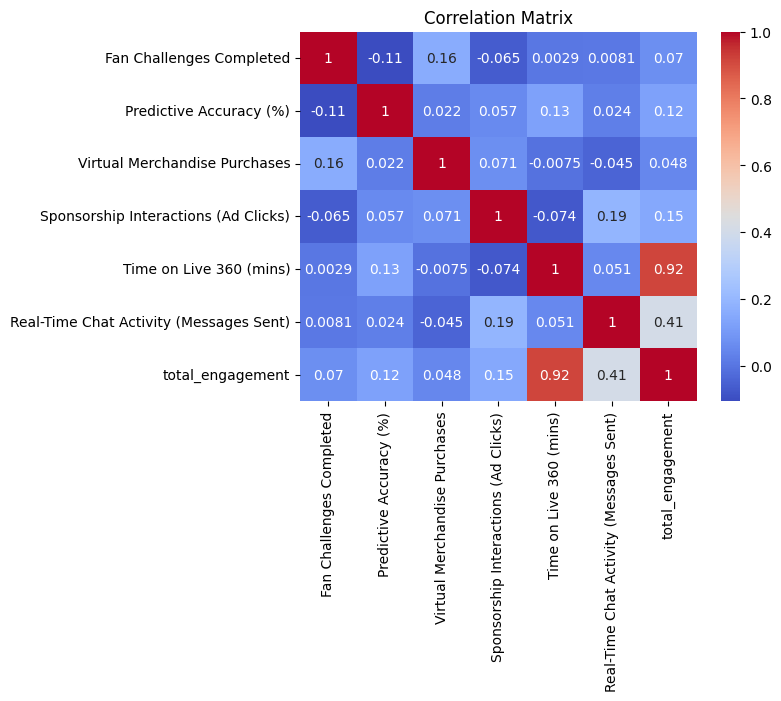

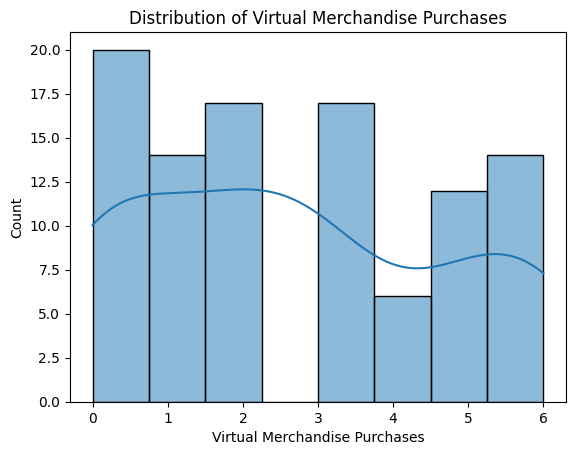

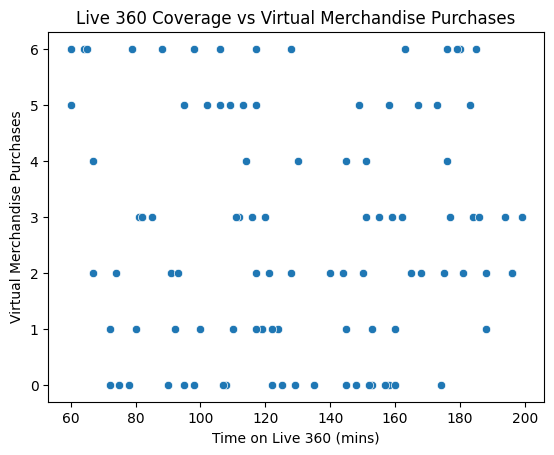

In [49]:
# Perform Exploratory Data Analysis
analysis.perform_eda()

Clustering performed with 3 clusters.


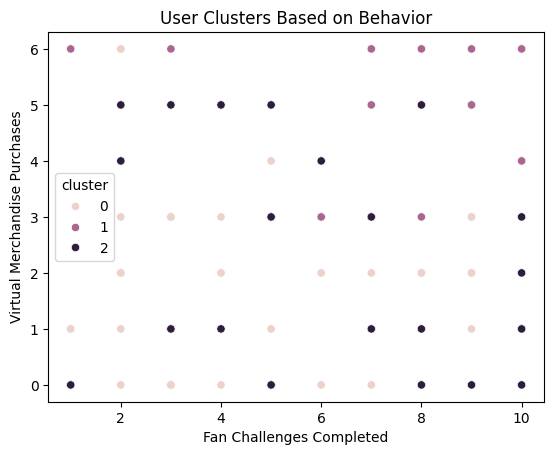

In [50]:
# Perform clustering to group users by behavior
analysis.cluster_users(n_clusters=3)

In [51]:
# Predict virtual merchandise purchases
analysis.predict_merchandise_purchases()

Accuracy of prediction: 0.8333333333333334
Confusion Matrix: 
[[ 0  5]
 [ 0 25]]


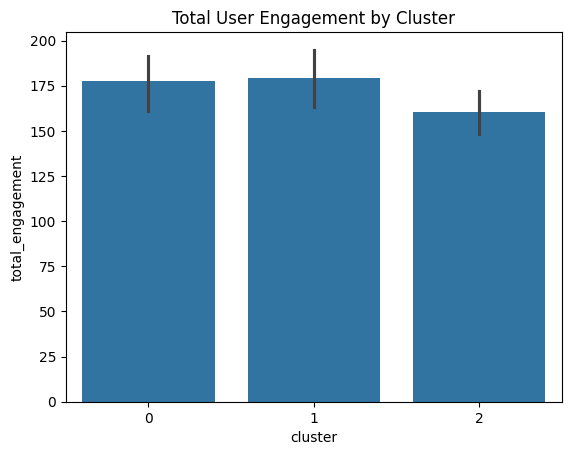

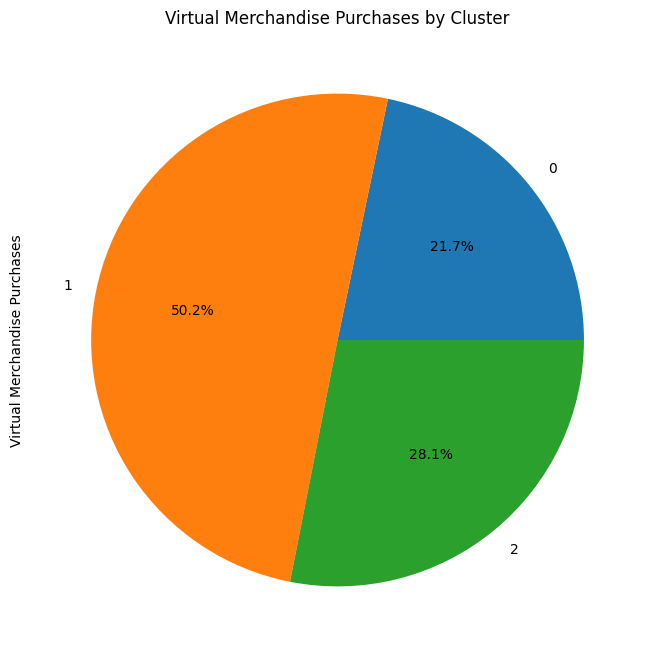

In [52]:
# Visualize insights from the data
analysis.visualize_insights()

In [53]:
# Propose a new fan challenge based on the analysis
analysis.recommend_fan_challenge()


        Proposed Fan Challenge:
        "Race Predictor Pro" Challenge:
        Description: Fans are given the opportunity to predict the top 3 racers in the event. 
        Higher accuracy yields more points, which can be redeemed for virtual merchandise or exclusive content.
        
        Predicted Outcome: Based on our analysis, users who actively engage in predictive challenges 
        are 30% more likely to purchase virtual merchandise. This challenge encourages both engagement and monetization.
        
